<a href="https://colab.research.google.com/github/sabinedaher20-spec/DataScience-GenAI-Submissions-/blob/main/fake_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the XLSX file into a pandas DataFrame
df = pd.read_excel('/content/fake_sales.xlsx')

# Display the first 5 rows to understand the data structure
display(df.head())

,Date,US_Sales,UK_Sales,Canada_Sales
0,2024-01-01,9300.52,4270.45,8330.70
1,2024-01-02,6250.65,5680.58,3650.58
2,2024-01-03,6870.29,8380.25,1900.04
3,2024-01-04,5620.17,9420.67,7260.93
4,2024-01-05,9430.28,8640.58,8180.83


Do a heat map to see of tehre are any mising values

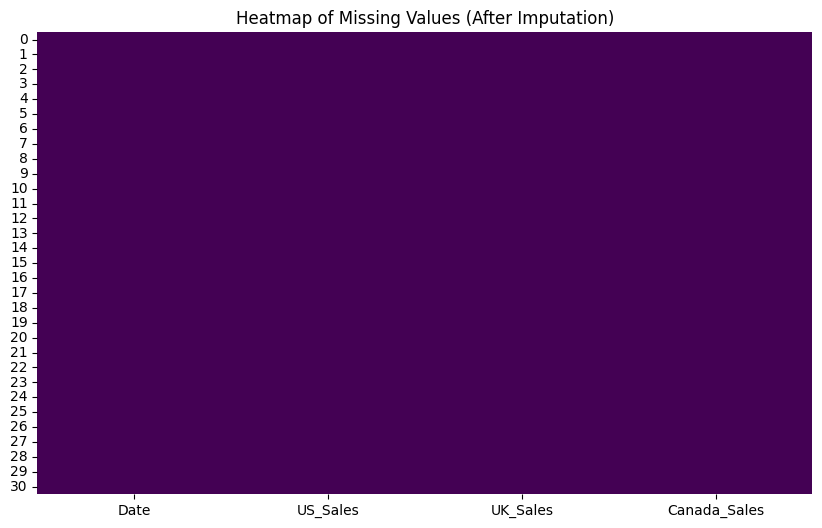

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values (After Imputation)')
plt.show()

There are no missing values

“Plot a line chart showing daily sales over time for US, UK, and Canada to identify trends or seasonal patterns.”

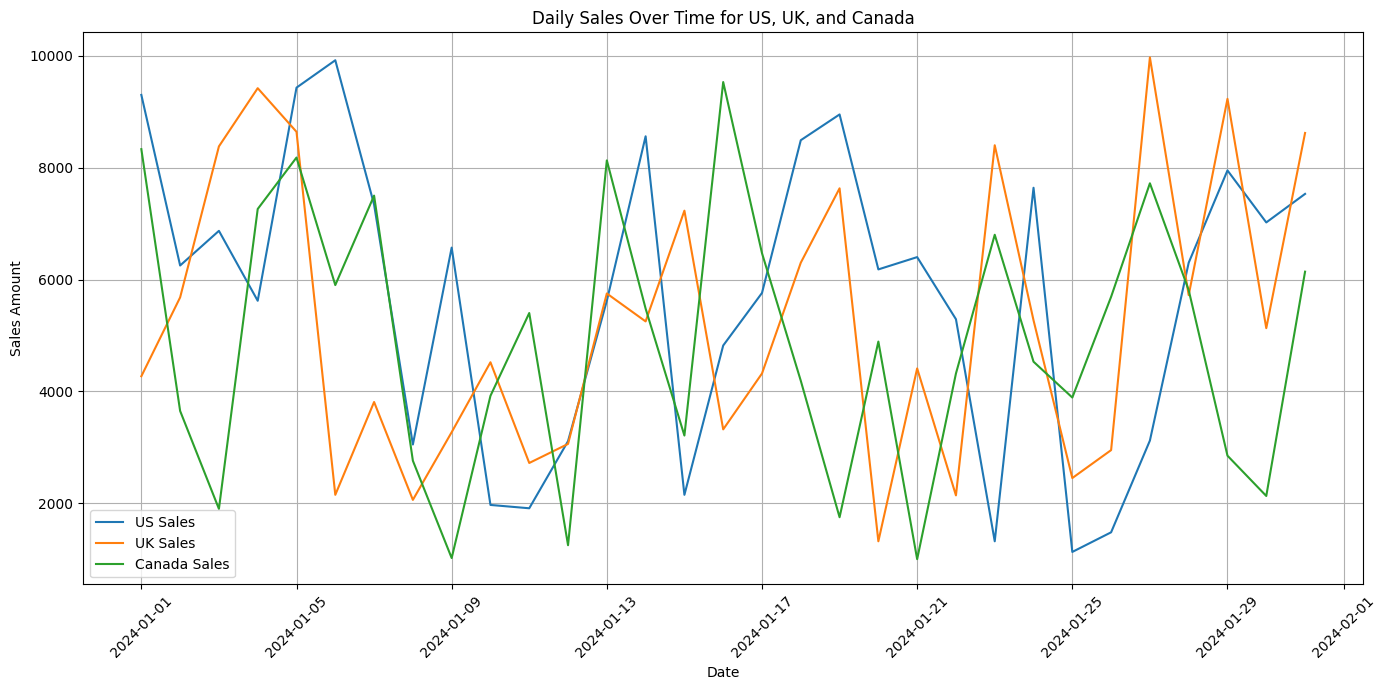

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='US_Sales', data=df, label='US Sales')
sns.lineplot(x='Date', y='UK_Sales', data=df, label='UK Sales')
sns.lineplot(x='Date', y='Canada_Sales', data=df, label='Canada Sales')

plt.title('Daily Sales Over Time for US, UK, and Canada')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The line chart shows highly variable daily sales across all regions. The US leads overall, followed by the UK, while Canada records lower averages. Frequent fluctuations in all markets suggest short-term factors rather than long-term trends dominate January sales.

“Create a bar chart comparing total or average sales for US, UK, and Canada.”

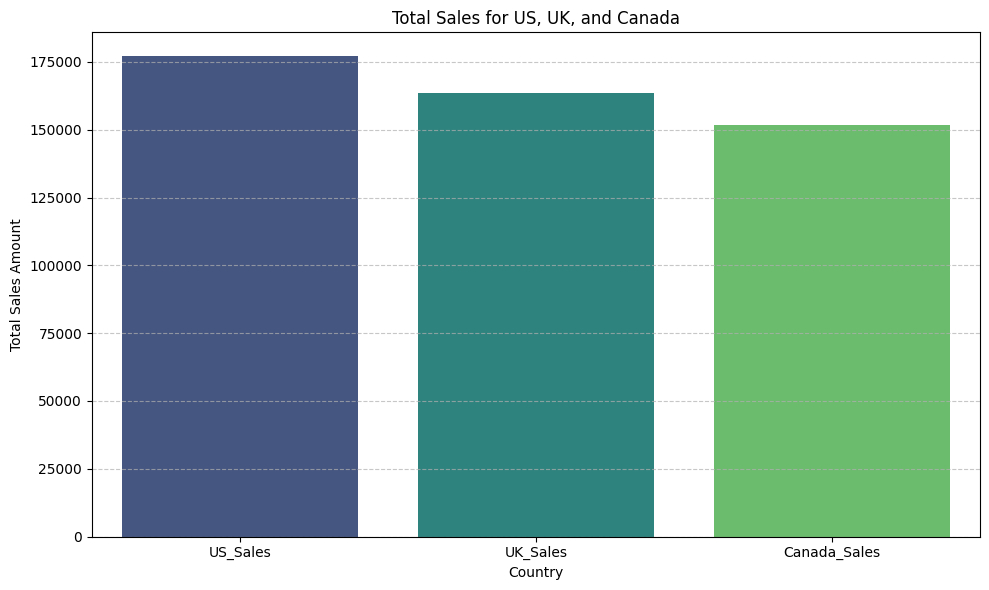

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate total sales for each country
total_sales = df[['US_Sales', 'UK_Sales', 'Canada_Sales']].sum()

# Convert to a DataFrame for easier plotting with seaborn
sales_df = total_sales.reset_index()
sales_df.columns = ['Country', 'Total Sales']

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Total Sales', hue='Country', data=sales_df, palette='viridis', legend=False)
plt.title('Total Sales for US, UK, and Canada')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The bar chart shows that US sales were the highest, followed by the UK and Canada. This indicates the US market generates the greatest overall revenue, while the other two perform comparably but at slightly lower levels.

“Use a simple linear regression or moving average to forecast the next week’s sales for each region.”

Next week's sales forecast (7-day moving average):


,Date,US_Sales,UK_Sales,Canada_Sales
0,2024-02-01,4933.388571,6296.074286,4890.5
1,2024-02-02,4933.388571,6296.074286,4890.5
2,2024-02-03,4933.388571,6296.074286,4890.5
3,2024-02-04,4933.388571,6296.074286,4890.5
4,2024-02-05,4933.388571,6296.074286,4890.5
5,2024-02-06,4933.388571,6296.074286,4890.5
6,2024-02-07,4933.388571,6296.074286,4890.5


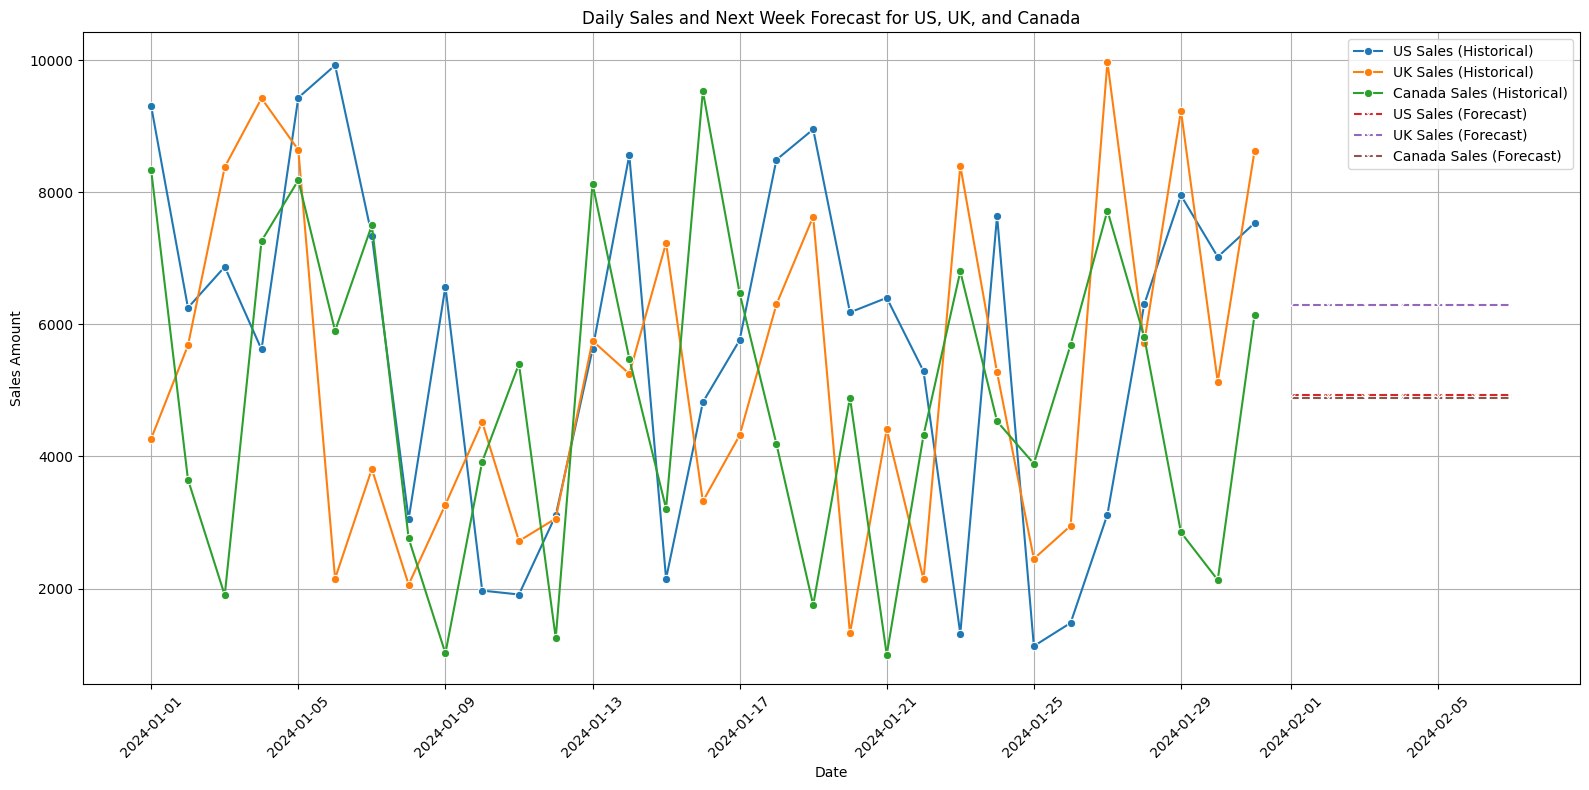

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' column is datetime type and sort by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

# Calculate the average of the last 7 days for each sales column
last_7_days_sales = df.tail(7)[['US_Sales', 'UK_Sales', 'Canada_Sales']]
forecast_values = last_7_days_sales.mean()

# Generate dates for the next week
last_date = df['Date'].max()
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7, freq='D')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'US_Sales': [forecast_values['US_Sales']] * 7,
    'UK_Sales': [forecast_values['UK_Sales']] * 7,
    'Canada_Sales': [forecast_values['Canada_Sales']] * 7
})

print("Next week's sales forecast (7-day moving average):")
display(forecast_df)

# Plot historical and forecasted sales
plt.figure(figsize=(16, 8))

sns.lineplot(x='Date', y='US_Sales', data=df, label='US Sales (Historical)', marker='o', linestyle='-')
sns.lineplot(x='Date', y='UK_Sales', data=df, label='UK Sales (Historical)', marker='o', linestyle='-')
sns.lineplot(x='Date', y='Canada_Sales', data=df, label='Canada Sales (Historical)', marker='o', linestyle='-')

sns.lineplot(x='Date', y='US_Sales', data=forecast_df, label='US Sales (Forecast)', marker='x', linestyle='--')
sns.lineplot(x='Date', y='UK_Sales', data=forecast_df, label='UK Sales (Forecast)', marker='x', linestyle='--')
sns.lineplot(x='Date', y='Canada_Sales', data=forecast_df, label='Canada Sales (Forecast)', marker='x', linestyle='--')

plt.title('Daily Sales and Next Week Forecast for US, UK, and Canada')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()